# Red Neuronal Convolucional (CNN) Básica con Keras y TensorFlow: Clasificación de Imágenes

## Guía Didáctica

### Introducción

En este cuaderno, profundizaremos en los fundamentos de las Redes Neuronales Convolucionales (CNNs), una clase de redes neuronales particularmente efectiva para el procesamiento y análisis de imágenes. Utilizaremos las librerías Keras (como API de alto nivel) y TensorFlow (como _backend_ subyacente) para desarrollar y entrenar un modelo capaz de clasificar imágenes de prendas de vestir a partir del reconocido dataset Fashion MNIST.

Este material ha sido meticulosamente diseñado para servir como una guía comprensiva, ofreciendo tanto la fundamentación teórica indispensable como la implementación práctica detallada.

## 1. Preparación del Entorno: Importación de Librerías

El primer paso en cualquier proyecto de desarrollo de modelos de Machine Learning consiste en la importación de las librerías necesarias. Estas bibliotecas proporcionan las funcionalidades y herramientas esenciales para la manipulación de datos, la construcción del modelo y la visualización de resultados.

### Conceptos Teóricos:

*   **`numpy`**: Librería fundamental para la computación numérica en Python, optimizada para trabajar con arrays y matrices. Es esencial para la manipulación eficiente de los datos de imágenes y tensores.
*   **`matplotlib.pyplot`**: Módulo de la librería `matplotlib` que ofrece una interfaz similar a MATLAB para la creación de gráficos y visualizaciones estáticas, animadas e interactivas en Python. Se empleará para la visualización de imágenes y resultados.
*   **`tensorflow`**: La plataforma _open-source_ integral de Google para Machine Learning. Proporciona un ecosistema robusto de herramientas, librerías y recursos comunitarios que permiten a los investigadores impulsar el _machine learning_ de vanguardia y a los desarrolladores construir y desplegar aplicaciones basadas en ML.
*   **`tensorflow.keras`**: Keras es una API de alto nivel para construir y entrenar modelos de _deep learning_. Dada su naturaleza modular y orientada al usuario, facilita la prototipación rápida y se integra directamente en TensorFlow, simplificando significativamente el proceso de construcción de redes neuronales.

In [1]:
import numpy as np                 # Para operaciones numéricas eficientes, especialmente con los datos de imágenes.
import matplotlib.pyplot as plt    # Para la visualización de imágenes y gráficos.
import tensorflow as tf            # La plataforma principal de Deep Learning.
from tensorflow.keras import layers, models # Módulos de Keras para la construcción y definición de modelos.

2025-06-16 22:45:51.112248: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-16 22:45:51.115687: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-16 22:45:51.142491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-16 22:45:51.142568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-16 22:45:51.143401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## 2. Carga y Preprocesamiento de Datos: El Dataset Fashion MNIST

Una vez configurado el entorno, el siguiente paso crítico es la carga y el preprocesamiento de los datos. Para esta demostración, utilizaremos el dataset Fashion MNIST, una colección estándar y ampliamente utilizada para tareas de clasificación de imágenes.

### Conceptos Teóricos:

*   **Dataset `fashion_mnist`**: Constituye un conjunto de datos que incluye 70.000 imágenes en escala de grises de 28x28 píxeles, distribuidas en 10 categorías de prendas de vestir (por ejemplo, remeras, pantalones, zapatillas). De estas, 60.000 imágenes se destinan al entrenamiento del modelo y 10.000 a su evaluación (test).
*   **Normalización (`x_train / 255.0`)**: Los valores de los píxeles de las imágenes suelen oscilar entre 0 (negro) y 255 (blanco). Las redes neuronales tienden a converger más eficientemente cuando los datos de entrada se encuentran en una escala reducida, típicamente entre 0 y 1. La división por 255 (el valor máximo posible) logra esta normalización. Este paso contribuye a la estabilidad y velocidad del proceso de entrenamiento.
*   **Reshape (`.reshape(-1, 28, 28, 1)`)**: Las redes neuronales convolucionales (CNNs) requieren que las imágenes de entrada incluyan una dimensión para el "canal" de color. Las imágenes originales de Fashion MNIST poseen dimensiones de 28x28. La operación `reshape(-1, 28, 28, 1)` ajusta la forma del tensor, indicando que cada imagen tiene 28 píxeles de alto, 28 píxeles de ancho y 1 canal (ya que son imágenes en escala de grises; para imágenes RGB, serían 3 canales). El valor `-1` permite que TensorFlow infiera automáticamente el tamaño de esa dimensión basándose en el número total de elementos.

In [2]:
# Cargamos el dataset Fashion MNIST, que está disponible directamente en TensorFlow.Keras.
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalización de los valores de píxeles: Transformamos el rango de 0-255 a 0-1.
# Este paso es fundamental para optimizar el proceso de aprendizaje de la red neuronal.
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape de las imágenes para incluir la dimensión del canal.
# Las CNNs esperan un formato (número_de_muestras, altura, anchura, canales).
# Dado que las imágenes son en escala de grises, se añade 1 canal.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Dimensiones de las imágenes de entrenamiento: {x_train.shape}")
print(f"Dimensiones de las etiquetas de entrenamiento: {y_train.shape}")
print(f"Dimensiones de las imágenes de test: {x_test.shape}")
print(f"Dimensiones de las etiquetas de test: {y_test.shape}")

4422102/4422102 [==============================] - 0s 0us/step
Dimensiones de las imágenes de entrenamiento: (60000, 28, 28, 1)
Dimensiones de las etiquetas de entrenamiento: (60000,)
Dimensiones de las imágenes de test: (10000, 28, 28, 1)
Dimensiones de las etiquetas de test: (10000,)


## 3. Exploración de Datos: Visualización del Dataset

Es una práctica recomendable inspeccionar visualmente una muestra del dataset para comprender la naturaleza de los datos con los que se está trabajando. Esto proporciona una intuición inicial sobre las características que el modelo deberá aprender a identificar y clasificar.

### Conceptos Teóricos:

*   **`class_names`**: Una lista que mapea los índices numéricos de las etiquetas (salida del dataset) a sus correspondientes nombres de clase en formato de texto (ej., 0 a 'T-shirt/top', 1 a 'Trouser').
*   **`plt.figure()`, `plt.subplot()`, `plt.imshow()`, `plt.title()`**: Son funciones de `matplotlib` que permiten la creación de un lienzo para múltiples gráficos (`figure`), la disposición de gráficos en una grilla (`subplot`), la visualización de una imagen (`imshow`) y la asignación de un título descriptivo (`title`).
*   **`cmap='gray'`**: Un argumento que especifica la colormap a utilizar para la visualización de la imagen, indicando que debe representarse en escala de grises. Para imágenes a color, se usaría otro `cmap` o se omitiría.

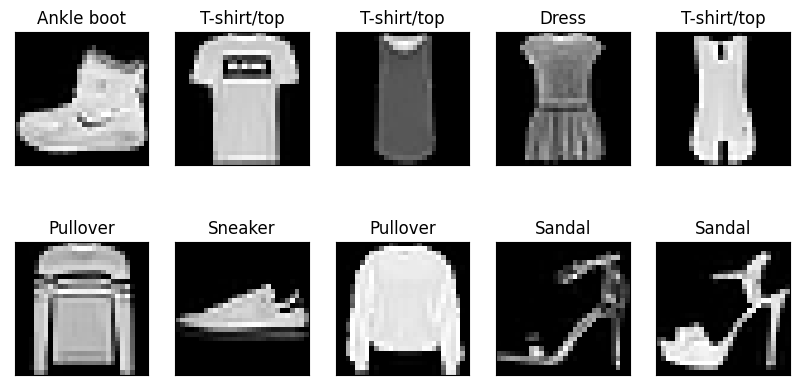

In [3]:
# Definimos los nombres de las clases para una interpretación más clara de las etiquetas numéricas.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Creamos una figura para visualizar las primeras 10 imágenes del conjunto de entrenamiento.
plt.figure(figsize=(10,5))
# Iteramos a través de las primeras 10 imágenes.
for i in range(10):
    plt.subplot(2,5,i+1) # Establecemos una cuadrícula de 2 filas y 5 columnas para la disposición de las imágenes.
    plt.xticks([])       # Eliminamos las marcas del eje X para una visualización más limpia.
    plt.yticks([])       # Eliminamos las marcas del eje Y.
    # Mostramos la imagen. Se redimensiona temporalmente a 28x28 para la visualización por matplotlib
    # (matplotlib espera imágenes sin la dimensión de canal si son escala de grises).
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    # Asignamos el nombre de la clase correspondiente a la etiqueta como título de la imagen.
    plt.title(class_names[y_train[i]])
plt.show() # Renderizamos la figura con las imágenes.

## 4. Construcción del Modelo CNN: Arquitectura y Capas

La fase de construcción del modelo es fundamental para definir la arquitectura de la red neuronal. En las CNNs, esta arquitectura se compone de capas especializadas en el procesamiento de imágenes, como las capas convolucionales y de _pooling_, seguidas por capas densas para la clasificación final de las características extraídas.

### Conceptos Teóricos:

*   **`models.Sequential`**: Es la forma más sencilla y común de construir un modelo en Keras, permitiendo apilar capas linealmente, una tras otra, formando una secuencia de transformaciones.
*   **`layers.Conv2D` (Capa Convolucional Bidimensional)**:
    *   Es el componente central de las CNNs. Aplica un conjunto de "filtros" o "kernels" bidimensionales a la imagen de entrada para detectar características locales como bordes, texturas o patrones específicos.
    *   `32` (o `64`): Indica el número de filtros (o kernels) que esta capa aprenderá. Un mayor número de filtros permite la detección de una mayor diversidad y complejidad de patrones.
    *   `(3, 3)`: Define las dimensiones del kernel (una ventana de 3x3 píxeles que se desliza sobre la imagen).
    *   `activation='relu'`: La función de activación Rectified Linear Unit (`max(0, x)`). Introduce no-linealidad en la red, lo que es esencial para que el modelo pueda aprender relaciones complejas. Sin funciones de activación, la red solo podría modelar relaciones lineales, lo cual es insuficiente para la mayoría de las tareas de visión por computadora.
    *   `input_shape=(28, 28, 1)`: Se especifica exclusivamente en la *primera* capa del modelo para indicar las dimensiones esperadas de las imágenes de entrada (altura, anchura, canales).
*   **`layers.MaxPooling2D` (Capa de Agrupamiento Máximo Bidimensional)**:
    *   Su propósito es reducir la dimensionalidad espacial de los "mapas de características" generados por las capas convolucionales. Esto se logra seleccionando el valor máximo dentro de ventanas deslizantes.
    *   `(2, 2)`: Define el tamaño de la ventana de agrupamiento. Esta operación selecciona el valor máximo dentro de cada región de 2x2 píxeles, lo que resulta en una reducción a la mitad de las dimensiones espaciales (altura y anchura) del mapa de características.
    *   Contribuye a disminuir la cantidad de parámetros y operaciones computacionales, al tiempo que confiere al modelo mayor robustez ante pequeñas variaciones en la posición de las características (invariancia a la traslación).
*   **`layers.Flatten` (Capa de Aplanamiento)**:
    *   Transforma la salida multidimensional (2D o 3D, como los mapas de características) de las capas convolucionales y de _pooling_ en un vector unidimensional.
    *   Este paso es necesario para conectar las capas convolucionales (que operan en datos espaciales) con las capas `Dense` (totalmente conectadas), que requieren una entrada en formato de vector plano.
*   **`layers.Dense` (Capa Densa o Totalmente Conectada)**:
    *   Son capas neuronales tradicionales donde cada neurona de la capa actual está conectada a todas las neuronas de la capa anterior. Se utilizan para procesar las características extraídas y realizar la clasificación final.
    *   `64`: Representa el número de neuronas en esta capa oculta.
    *   `10`: Corresponde al número de neuronas en la capa de salida. Dado que tenemos 10 categorías de prendas, se requiere una neurona por cada clase.
    *   `activation='softmax'`: La función de activación Softmax se aplica en la capa de salida para problemas de clasificación multiclase. Transforma los valores de salida en un conjunto de probabilidades, donde la suma de todas las probabilidades es igual a 1. La clase asociada a la probabilidad más alta se considera la predicción del modelo.
*   **`model.summary()`**: Proporciona un resumen textual de la arquitectura del modelo, incluyendo el tipo de capa, la forma de la salida de cada capa (`Output Shape`) y el número de parámetros (`Param #`) que cada capa debe aprender. Esta herramienta es invaluable para la inspección y depuración del modelo.

### Arquitectura de Nuestra CNN Propuesta:

1.  **Capa Convolucional (`Conv2D`)**: Aprende 32 filtros de 3x3. Recibe la imagen original de 28x28x1.
2.  **Capa de MaxPooling (`MaxPooling2D`)**: Reduce las dimensiones espaciales a la mitad (ej., de 28x28 a 14x14).
3.  **Capa Convolucional (`Conv2D`)**: Aprende 64 filtros de 3x3. Opera sobre los mapas de características resultantes de la capa anterior, detectando patrones de mayor complejidad.
4.  **Capa de MaxPooling (`MaxPooling2D`)**: Vuelve a reducir las dimensiones espaciales a la mitad (ej., de 14x14 a 7x7).
5.  **Capa Flatten**: Transforma la salida convolucional (ej., 7x7x64) en un vector unidimensional.
6.  **Capa Densa (`Dense`)**: Una capa oculta con 64 neuronas para procesar las características aplanadas.
7.  **Capa Densa (`Dense`)**: La capa de salida con 10 neuronas (una por cada clase) y activación `softmax` para generar probabilidades.

In [4]:
# Definimos el modelo secuencial, donde las capas se apilan linealmente.
model = models.Sequential([
    # Primera capa convolucional:
    # 32 filtros de 3x3, con función de activación ReLU.
    # 'input_shape' solo se especifica en la primera capa para indicar el formato de las entradas (28x28 píxeles, 1 canal).
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Primera capa de MaxPooling:
    # Reduce las dimensiones espaciales (altura y anchura) a la mitad, seleccionando el valor máximo en cada ventana de 2x2.
    layers.MaxPooling2D((2, 2)),
    # Segunda capa convolucional:
    # 64 filtros de 3x3, con función de activación ReLU. Opera sobre los mapas de características previamente extraídos.
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Segunda capa de MaxPooling:
    # Vuelve a reducir las dimensiones espaciales de los mapas de características.
    layers.MaxPooling2D((2, 2)),
    # Capa Flatten:
    # Convierte la salida de las capas convolucionales y de pooling (que es multidimensional) en un vector 1D.
    # Esto es necesario para conectar con las capas densas.
    layers.Flatten(),
    # Primera capa densa (oculta):
    # Contiene 64 neuronas con función de activación ReLU, procesando las características aplanadas.
    layers.Dense(64, activation='relu'),
    # Capa de salida:
    # Contiene 10 neuronas (una por cada clase de prenda) y utiliza la función de activación softmax.
    # Softmax convierte los valores de salida en probabilidades para cada clase, sumando 1.
    layers.Dense(10, activation='softmax')
])

# Compilamos el modelo:
# Configuramos el optimizador, la función de pérdida y las métricas para el entrenamiento.
model.compile(optimizer='adam',                        # 'Adam' es un optimizador ampliamente utilizado y efectivo para una rápida convergencia.
              loss='sparse_categorical_crossentropy',  # Función de pérdida adecuada para clasificación multiclase con etiquetas enteras.
              metrics=['accuracy'])                  # Métrica de evaluación durante el entrenamiento: la precisión (proporción de aciertos).

# Mostramos un resumen detallado de la arquitectura del modelo.
# Esto incluye el tipo de cada capa, la forma de su salida y el número de parámetros entrenables en cada una.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## 5. Entrenamiento del Modelo: Proceso de Aprendizaje

Una vez que el modelo ha sido definido y compilado, se procede a su entrenamiento. Durante esta fase, el modelo ajusta sus parámetros internos (pesos y sesgos) basándose en los datos de entrenamiento, con el objetivo primordial de minimizar la función de pérdida y, consecuentemente, mejorar su rendimiento en la tarea de clasificación.

### Conceptos Teóricos:

*   **`model.fit()`**: Es la función central encargada de ejecutar el proceso de entrenamiento del modelo. Recibe como argumentos principales los datos de entrenamiento (`x_train`, `y_train`).
*   **`epochs`**: Una "época" representa una pasada completa de todo el dataset de entrenamiento a través de la red neuronal. Durante cada época, el modelo ve cada ejemplo de entrenamiento una vez y ajusta sus pesos. Por ejemplo, `epochs=5` indica que el modelo procesará y aprenderá de la totalidad del dataset de entrenamiento en 5 ocasiones.
*   **`validation_data=(x_test, y_test)`**: Es de suma importancia monitorear el desempeño del modelo con datos que *no han sido vistos* durante el entrenamiento (`x_test`, `y_test`). Esto permite detectar el fenómeno de **overfitting** (sobreajuste), donde el modelo memoriza excesivamente los datos de entrenamiento (incluyendo el ruido), lo que resulta en un pobre desempeño con datos nuevos e invisibles. El `validation_data` nos ayuda a evaluar la capacidad de generalización del modelo en cada época, proporcionando métricas de validación.

In [5]:
print("Iniciando el proceso de entrenamiento del modelo. Este paso puede tomar unos minutos dependiendo del hardware disponible.")
# Entrenamos el modelo.
# Se proporcionan los datos de entrenamiento y los datos de validación (test) para monitorear el desempeño en datos no vistos.
# 'epochs' define el número de veces que el modelo iterará sobre todo el conjunto de datos de entrenamiento.
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
print("Entrenamiento del modelo completado.")

Iniciando el proceso de entrenamiento del modelo. Este paso puede tomar unos minutos dependiendo del hardware disponible.
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4705 - accuracy: 0.8291 - val_loss: 0.3590 - val_accuracy: 0.8698
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3124 - accuracy: 0.8853 - val_loss: 0.3021 - val_accuracy: 0.8925
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2664 - accuracy: 0.9018 - val_loss: 0.2844 - val_accuracy: 0.8958
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2346 - accuracy: 0.9133 - val_loss: 0.2694 - val_accuracy: 0.8993
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2083 - accuracy: 0.9230 - val_loss: 0.2585 - val_accuracy: 0.9028
Entrenamiento del modelo completado.


## 6. Evaluación y Predicciones: Análisis del Rendimiento

Concluido el entrenamiento, es imperativo evaluar el desempeño final del modelo con datos que no ha procesado durante el aprendizaje y analizar sus predicciones para comprender su efectividad en la tarea de clasificación.

### Conceptos Teóricos:

*   **`model.evaluate()`**: Este método calcula la pérdida (`loss`) y las métricas (ej., `accuracy`) del modelo sobre el conjunto de datos de prueba (`x_test`, `y_test`). Proporciona una medida objetiva del rendimiento del modelo en datos que nunca formaron parte del entrenamiento.
*   **`model.predict()`**: Genera las predicciones de salida del modelo para un conjunto de datos dado. En este caso, para `x_test`. La salida consiste en un array de probabilidades para cada clase, para cada imagen de entrada.
*   **`np.argmax(predictions_array[i])`**: La función `np.argmax` de NumPy devuelve el índice del valor máximo en un array. Dado que `predictions` son arrays de probabilidades para las 10 clases (donde cada índice representa una clase), esto nos permite identificar la clase que el modelo predijo con la mayor confianza para una imagen específica.
*   **Visualización de predicciones**: La representación visual de ejemplos de predicciones, tanto correctas como incorrectas, es una herramienta pedagógica invaluable. La función auxiliar `plot_image` muestra la imagen de entrada, la predicción del modelo y la etiqueta real, indicando la corrección de la predicción mediante un cambio de color en el texto (azul para acierto, rojo para error), lo que facilita la comprensión del comportamiento del modelo.


Evaluando el modelo en el conjunto de datos de test...
313/313 - 1s - loss: 0.2585 - accuracy: 0.9028 - 632ms/epoch - 2ms/step

Precisión en el conjunto de test: 0.9028

Generando predicciones en el conjunto de test...
313/313 [==============================] - 1s 2ms/step

Visualizando algunas predicciones del modelo...


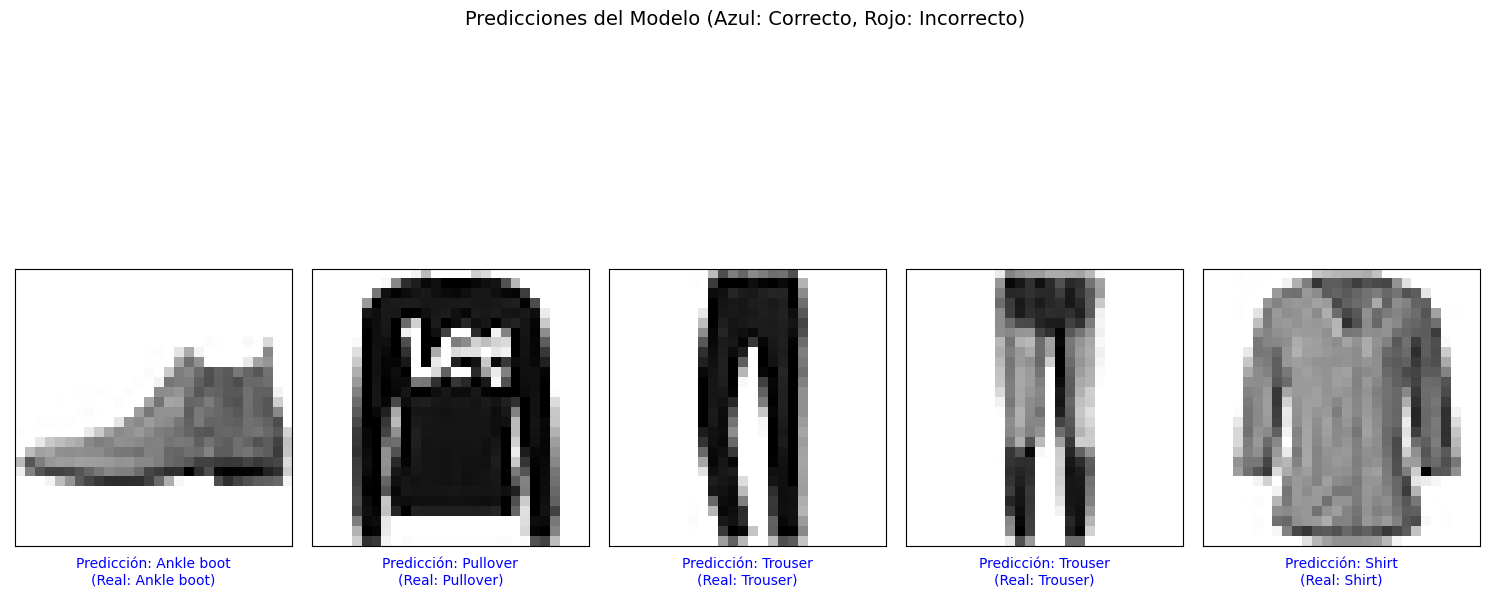

Finalizada la evaluación y visualización de predicciones.


In [6]:
# Evaluación del modelo en el conjunto de datos de test
print("\nEvaluando el modelo en el conjunto de datos de test...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nPrecisión en el conjunto de test: {test_acc:.4f}')

# Generación de predicciones sobre las imágenes del conjunto de test
print("\nGenerando predicciones en el conjunto de test...")
predictions = model.predict(x_test)

# Definición de una función auxiliar para visualizar una imagen junto con su predicción y la etiqueta verdadera.
def plot_image(i, predictions_array, true_label, img):
    # Recuperamos la etiqueta verdadera y la imagen correspondiente.
    true_label, img = true_label[i], img[i]
    plt.grid(False) # Desactivamos la cuadrícula de los ejes para una visualización más limpia.
    plt.xticks([])  # Eliminamos las marcas del eje X.
    plt.yticks([])  # Eliminamos las marcas del eje Y.

    # Mostramos la imagen, redimensionando temporalmente a 28x28 para la visualización con matplotlib.
    plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

    # Obtenemos la clase predicha (el índice con la probabilidad más alta de las predicciones).
    predicted_label = np.argmax(predictions_array[i])
    # Determinamos el color del texto: azul para predicciones correctas, rojo para incorrectas.
    color = 'blue' if predicted_label == true_label else 'red'

    # *** CORRECCIÓN CLAVE: Dividimos el texto en dos líneas para evitar la superposición ***
    # Usamos '\n' para insertar un salto de línea en la etiqueta.
    plt.xlabel(f"Predicción: {class_names[predicted_label]}\n(Real: {class_names[true_label]})",
               color=color, fontsize=10) # Reducimos ligeramente el tamaño de fuente para mayor seguridad.

# Creamos una figura para visualizar 5 ejemplos de predicciones.
# *** CORRECCIÓN CLAVE: Aumentamos el tamaño de la figura (especialmente el ancho) para dar más espacio. ***
plt.figure(figsize=(15, 7)) # Aumentado de (12,6) a (15,7) para más holgura.
print("\nVisualizando algunas predicciones del modelo...")
for i in range(5):
    plt.subplot(1,5,i+1) # Disponemos las imágenes en una grilla de 1 fila y 5 columnas.
    plot_image(i, predictions, y_test, x_test) # Invocamos la función de visualización para cada imagen.

# Título general para la figura. 'y=1.02' lo posiciona ligeramente por encima de la figura principal.
plt.suptitle('Predicciones del Modelo (Azul: Correcto, Rojo: Incorrecto)', y=1.02, fontsize=14)

# Ajustamos el layout para evitar superposiciones de títulos y ejes.
# El parámetro 'rect' define el rectángulo (left, bottom, right, top) en el que se ubicarán los subplots.
# 0.95 en 'top' deja más espacio en la parte superior para el suptitle.
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Finalizada la evaluación y visualización de predicciones.")

## 7. Conclusión y Próximos Pasos

Hemos completado el ciclo fundamental de desarrollo de una Red Neuronal Convolucional básica. Este proceso ha abarcado desde la preparación de los datos hasta la evaluación de un modelo capaz de clasificar imágenes de prendas de vestir con un rendimiento satisfactorio.

### Aprendizajes Clave Adquiridos:

*   Dominio de los métodos para la carga y el preprocesamiento de imágenes destinados a una CNN.
*   Comprensión de la arquitectura fundamental de una CNN, incluyendo la función y disposición estratégica de las capas `Conv2D`, `MaxPooling2D`, `Flatten` y `Dense`.
*   Conocimiento de los procedimientos para la compilación, entrenamiento y evaluación de un modelo utilizando las librerías Keras y TensorFlow.
*   Adquisición de técnicas para la visualización de predicciones, lo que permite un análisis cualitativo y cuantitativo del rendimiento del modelo.

### Sugerencias para la Exploración y Mejora Continua (Líneas de Investigación Futuras):

Para profundizar en el conocimiento y la aplicación de las CNNs, se proponen las siguientes líneas de investigación y experimentación, orientadas a optimizar el desempeño y la robustez del modelo:

*   **Incremento de Épocas de Entrenamiento**: Analizar el impacto de un mayor número de épocas de entrenamiento (ej., 10 o 20) en la precisión del modelo y en la posible aparición del fenómeno de overfitting (sobreajuste).
*   **Modificación de la Arquitectura del Modelo**: Experimentar con la adición de capas convolucionales adicionales, la variación en el número de filtros por capa, o el ajuste del tamaño y número de neuronas en las capas densas para observar su influencia en el rendimiento y la capacidad de abstracción.
*   **Implementación de Técnicas de Regularización**: Aplicar estrategias avanzadas como Dropout o regularización L1/L2 para mitigar el overfitting y mejorar la capacidad de generalización del modelo a datos no vistos.
*   **Aumento de Datos (_Data Augmentation_)**: Implementar transformaciones artificiales a las imágenes del conjunto de entrenamiento (rotaciones, zooms, volteos, etc.) para expandir el dataset de forma efectiva y, con ello, mejorar la robustez y generalización del modelo.
*   **Exploración de Otros Datasets**: Evaluar el desempeño del modelo con diferentes conjuntos de datos de imágenes para observar su adaptabilidad y generalización a nuevas tareas de clasificación.
*   **Optimización de Hiperparámetros**: Investigar otras funciones de pérdida (ej., `categorical_crossentropy` si las etiquetas fueran _one-hot encoded_) y optimizadores (ej., SGD, RMSprop) para identificar configuraciones óptimas que maximicen el rendimiento del modelo.

Se espera que esta guía sea de gran utilidad para la introducción y profundización en el fascinante campo del _Deep Learning_ aplicado a la visión por computadora. ¡Se alienta encarecidamente a la experimentación continua y a la aplicación de estos conceptos en nuevos desafíos!

## 8. Glosario de Términos Clave

Este glosario proporciona definiciones concisas y claras de los términos técnicos fundamentales empleados a lo largo de este cuaderno, facilitando la comprensión para estudiantes y docentes en el ámbito del _Deep Learning_ y las CNNs.

*   **Red Neuronal Convolucional (CNN)**: Un tipo de red neuronal profunda especialmente diseñada para procesar datos estructurados en cuadrículas, como imágenes, mediante la detección jerárquica y automática de patrones visuales.
*   **Keras**: Una interfaz de programación de aplicaciones (API) de alto nivel que simplifica la construcción, entrenamiento y evaluación de modelos de _deep learning_. Actúa como una capa de abstracción sobre _backends_ como TensorFlow.
*   **TensorFlow**: Una plataforma de _machine learning_ _open-source_ desarrollada por Google. Proporciona las herramientas y librerías necesarias para crear y desplegar modelos de aprendizaje automático a gran escala. Keras utiliza TensorFlow como su motor computacional subyacente.
*   **Dataset**: Un conjunto estructurado de datos (en nuestro caso, imágenes y sus etiquetas) utilizado para entrenar, validar y probar modelos de _machine learning_.
*   **Fashion MNIST**: Un dataset estándar compuesto por 70.000 imágenes en escala de grises de 10 categorías de prendas de vestir, comúnmente empleado en tareas de clasificación de imágenes debido a su tamaño manejable y diversidad de clases.
*   **Normalización**: Proceso de ajustar el rango de los valores de los datos de entrada (ej., píxeles de 0-255 a 0-1) para optimizar la estabilidad y velocidad del entrenamiento de la red neuronal. Ayuda a evitar que ciertos valores dominen el aprendizaje.
*   **Reshape**: Operación que modifica las dimensiones o la forma de un tensor o array, manteniendo la cantidad total de elementos. En imágenes, se usa para añadir la dimensión de canal requerida por las CNNs.
*   **Capa Convolucional (`Conv2D`)**: La capa fundamental de una CNN. Aplica un conjunto de filtros (kernels) a la imagen para extraer características relevantes como bordes, texturas o formas.
*   **Filtro / Kernel**: Una pequeña matriz de pesos que se "desliza" sobre la imagen de entrada, realizando operaciones de convolución para producir un mapa de características, resaltando patrones específicos en la imagen.
*   **Feature Map (Mapa de Características)**: La salida de una capa convolucional. Representa la respuesta de la imagen a un filtro particular, indicando la presencia y ubicación de ciertas características o patrones detectados.
*   **Capa de Agrupamiento Máximo (`MaxPooling2D`)**: Capa que reduce la dimensionalidad espacial de los mapas de características al seleccionar el valor máximo dentro de ventanas deslizantes. Esto disminuye la complejidad computacional y mejora la robustez del modelo a pequeñas traslaciones (invariancia).
*   **Aplanar (`Flatten`)**: Capa que transforma la salida multidimensional (ej., 2D o 3D) de las capas convolucionales y de _pooling_ en un vector unidimensional. Este paso es necesario para conectar estas capas con las capas densas, que esperan una entrada lineal.
*   **Capa Densa (`Dense`) / Capa Totalmente Conectada**: Una capa de neuronas donde cada neurona de la capa actual está conectada a todas las neuronas de la capa precedente. Son las capas tradicionales de las redes neuronales utilizadas para realizar clasificaciones finales o regresiones.
*   **Función de Activación**: Una función matemática no lineal aplicada a la salida de cada neurona. Es crucial para que la red pueda aprender patrones complejos y no lineales en los datos.
    *   **ReLU (Rectified Linear Unit)**: `max(0, x)`. Una función de activación simple y eficiente, ampliamente utilizada en capas ocultas por su buen rendimiento y facilidad de cálculo.
    *   **Softmax**: Una función de activación utilizada en la capa de salida para problemas de clasificación multiclase. Convierte un vector de valores reales en una distribución de probabilidad, donde la suma de todas las probabilidades es igual a 1. La clase con la probabilidad más alta es la predicción del modelo.
*   **Modelo Secuencial (`models.Sequential`)**: Una abstracción de Keras para construir modelos de redes neuronales apilando capas linealmente, de forma directa e intuitiva.
*   **Compilar (`model.compile`)**: Etapa donde se configura el modelo para el entrenamiento. Se especifican el optimizador (cómo se ajustan los pesos), la función de pérdida (cómo se mide el error) y las métricas (cómo se evalúa el rendimiento).
*   **Optimizador**: Un algoritmo que ajusta iterativamente los pesos internos de la red neuronal durante el entrenamiento con el objetivo de minimizar la función de pérdida.
    *   **Adam**: Un algoritmo de optimización adaptativo y eficiente, frecuentemente utilizado por su buen rendimiento en una amplia gama de tareas de _deep learning_.
*   **Función de Pérdida (`loss`)**: Una función matemática que cuantifica la discrepancia o el "error" entre las predicciones del modelo y los valores reales. El objetivo del entrenamiento es minimizar esta función.
    *   **`sparse_categorical_crossentropy`**: Una función de pérdida adecuada para problemas de clasificación multiclase donde las etiquetas de las clases se representan como enteros (ej., 0, 1, 2, ...), en lugar de vectores _one-hot encoded_.
*   **Métrica (`metrics`)**: Una medida de rendimiento utilizada para evaluar el modelo durante el entrenamiento y la evaluación, proporcionando una comprensión más intuitiva de su desempeño.
    *   **Accuracy (Precisión)**: La proporción de predicciones correctas sobre el número total de predicciones, indicando la exactitud del modelo.
*   **Época (`epoch`)**: Una iteración completa sobre todo el conjunto de datos de entrenamiento. En cada época, el modelo procesa cada ejemplo de entrenamiento una vez.
*   **`validation_data`**: Un subconjunto de datos (comúnmente el conjunto de test o una parte de este) utilizado para evaluar el modelo periódicamente durante el entrenamiento. Es crucial porque permite monitorear el desempeño del modelo en datos *no vistos* y ayuda a detectar el **overfitting**.
*   **Overfitting (Sobreajuste)**: Fenómeno en el cual un modelo aprende los datos de entrenamiento con excesiva precisión, incluso memorizando el ruido o las particularidades de ese conjunto específico, lo que resulta en un pobre desempeño con datos nuevos e invisibles (baja capacidad de generalización).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>